# Assignment 2

In [38]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from plotly.offline import plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (5.0, 6.0)

### Extra Task
Implement matrix multiplication of two matrices

In [2]:
# Example 1.
def dot(m1, m2):
    if len(m1[0]) != len(m2):
        print ("Cannot multiply the two matrices. Incorrect dimensions.")
    else:
        return [
        [sum(x * y for x, y in zip(m1_r, m2_c)) for m2_c in zip(*m2)] for m1_r in m1
    ]
            
dot([[1,2,3],[4,5,6],[7,8,9]],[[1,2],[3,4],[5,6]])

[[22, 28], [49, 64], [76, 100]]

In [3]:
# Example 2.
def matrixmult (A, B):
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])

    if cols_A != rows_B:
        print ("Cannot multiply the two matrices. Incorrect dimensions.")
        return
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] += A[i][k] * B[k][j]
    return C
matrixmult([[1,2,3],[4,5,6],[7,8,9]],[[1,2],[3,4],[5,6]])

[[22, 28], [49, 64], [76, 100]]

### Extra Task
Implement Hadamard product of two matrices

In [4]:
def operate_on_Narray(A, B, function):
    try:
        return [operate_on_Narray(a, b, function) for a, b in zip(A, B)]
    except TypeError as e:
        return function(A, B)

x = [[50, 2, 2],[2, 8, 2],[1, 2, 3]]
y = [[1, 4, 3],[1, 3, 3],[0, 3, 1]]
operate_on_Narray(x, y, lambda a, b: a*b)

[[50, 8, 6], [2, 24, 6], [0, 6, 3]]

### Data 

#### Please use HW_gender data from Assignment 1. Use the weight to predict the height of a person. You can try different variants: per gender or for overall data. Please argue why did you prefer one variant over another in the report. 

In [40]:
data = pd.read_csv('.\\HW_gender.csv')
data.head()
#Let's check for NAs
data.isnull().sum()
# Since there aren't any, we can continue


Gender    0
Weight    0
Height    0
dtype: int64

In [6]:
# Separate the target and feature pars
target  = data['Height']
feature = data['Weight']

# Linear Regression 

In [7]:
def c_m_values(n_of_features):
    coef = []
    for i in range(n_of_features + 1):
        coef.append(rd.random())
    return coef

def predict_values(coef, feature):
    predicted = []
    for i in range(len(feature)):         
        predicted.append(coef[0] + coef[1] * feature[i]) 
    return predicted

def test(iteration_count, coef, observations_count, real_values, feature):
    learning_rate = 0.005
    for  i in range(5):
        learning_rate += 0.01
        gradient_descent(iteration_count, coef, observations_count, real_values, learning_rate, feature)

### Implement "loss" function

In [8]:
def RMSE(predicted_values, real_values):
    n_of_observations = len(real_values)
    loss_sum = 0.0 
    for i in range(n_of_observations):
        loss_sum += pow((real_values[i] - predicted_values[i]),2)
    return pow(1/n_of_observations * loss_sum, 1/2)

### Implement "fit" function gradient descent 

In [9]:
def gradient_descent(iteration_count, coef, observations_count, real_values, learning_rate, feature):
    loss = []
    cost_function_value = 0.0
    for i in range(iteration_count):
        predicted_values = predict_values(coef, feature)
        sum_val_0 = 0.0
        sum_val_1 = 0.0
        for c in range(observations_count):
            sum_val_0 += (predicted_values[c] - real_values[c])
            sum_val_1 += (predicted_values[c] - real_values[c])*feature[c]
        coef[0] -= 1/observations_count * learning_rate * sum_val_0
        coef[1] -= 1/observations_count * learning_rate * sum_val_1
        
        loss.append(RMSE(predicted_values,real_values))
    plot_loss_function(iteration_count, loss)
    return coef, cost_function_value

### Implement "predict" function 

In [10]:
y_predict = coef[0] + coef[1]*feature
print(y_predict.head())

NameError: name 'coef' is not defined

### Depict the plot of loss over iterations

In [11]:
# Depict the plot of loss over iterations
def plot_loss_function(iterations, loss_values):
    it = range(iterations)
    plt.plot(it, loss_values)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('loss over iterations')
    plt.show()

### Choose the "learning rate" value, show the comparison to other values via loss plot

In [12]:
print("Test on different learning rate values...")
test(iterations, coef, observations_count, target, feature)

Test on different learning rate values...


NameError: name 'iterations' is not defined

### Plot the regression line you have found

NameError: name 'y_predict' is not defined

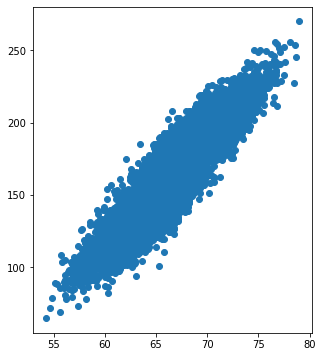

In [25]:
plt.scatter(feature,target)
plt.plot(feature,y_predict,'r-')
plt.xlabel('Weight')
plt.ylabel('Predicted Height')
plt.title('Original Data and predicted Heights line')
plt.show();

Linear regression started...


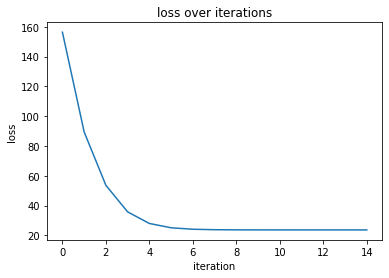

End of linear regression!!!
estimated Intercept:  0.38759299557468024
estimated Slope:  2.444027317672486
cost:  0.0


In [53]:
coef  = c_m_values(1)
observations_count = len(data)
iterations         = 15  
learning_rate      = 0.0001 
print("Linear regression started...")
best_theta_values, cost_function_value = gradient_descent(iterations, coef, observations_count, target, learning_rate, x)
print("End of linear regression!!!")
print("estimated Intercept: ", coef[0])
print("estimated Slope: ", coef[1])
print("cost: ", cost_function_value)

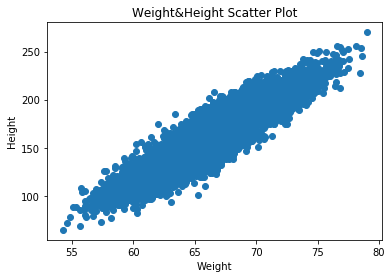

''

In [49]:
plt.scatter(feature, target)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight&Height Scatter Plot')
plt.show()
;

In [30]:
db = pd.read_csv(".\\HW_gender.csv")

# create a pandas dataframe of ones for the bias term
ones_ = pd.DataFrame(np.ones(db.shape[0]))
ones_.columns = ['bias']
db = pd.concat([ones_, db], axis = 1)

y = db['Height']
X = db[['bias', 'Weight']]

# Linear Regression 
### Implement "loss" function
### Implement "fit" function gradient descent

def grad_descent(features, target, a, iterations = 50):

    """this function implements vectorized gradient descent
   using the following arguments:
   
   features - this is the dataset of features
   target - this is the target vector
   a - this is the learning rate
   iteraions - the iteratins of parameter updates

   n - this is the number of features
   m - this is the number of observations
   theta - these are the parameters, initialized to one by default"""

    n = features.shape[1]
    m = features.shape[0]
    theta = np.ones(n)

  # cost function

    cost_list = []


    for i in range(iterations):

        cost = 1/(2*m)*np.transpose((X@theta - y))@(X@theta - y)

        theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
        cost_list.append(cost)

    return theta, cost_list

# linear regression with gradient descent
theta, cost_list = grad_descent(X, y, a = 0.0001)
print(cost_list)

[4833.439719130723, 1698.8264647336796, 722.9786324699724, 419.1838352303947, 324.60828768535276, 295.16553794279696, 285.9995139593796, 283.14591046741657, 282.25744932314603, 281.9807637176248, 281.89453215750046, 281.8675915319388, 281.8591089807245, 281.8563726791475, 281.85542526329544, 281.85503475196225, 281.85481761264367, 281.8546544464552, 281.8545080829, 281.8543669502971, 281.85422744622485, 281.8540884492003, 281.8539496100906, 281.8538108202059, 281.85367204570974, 281.8535332760681, 281.8533945080019, 281.85325574049, 281.85311697321475, 281.8529782060771, 281.8528394390463, 281.8527006721129, 281.8525619052737, 281.85242313852785, 281.85228437187504, 281.8521456053153, 281.8520068388484, 281.8518680724745, 281.8517293061935, 281.8515905400055, 281.8514517739103, 281.8513130079081, 281.8511742419989, 281.8510354761825, 281.8508967104591, 281.8507579448287, 281.85061917929113, 281.85048041384664, 281.8503416484949, 281.85020288323614]


In [23]:
# My Version
x = data[['Weight']]
y  = data['Height']

model = LinearRegression()
model.fit(x, y)
model.coef_, model.intercept_
print('Slope Coefficients:', model.coef_)
print('\nIntercept Value:', model.intercept_)

Slope Coefficients: [7.71728764]

Intercept Value: -350.73719181213744


In [26]:
model.predict(x)
model.score

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [41]:
# Another version
feat = data[['Weight']]
targ = data.iloc[:,-1]
data.head()
targ.head()

x_train, x_test, y_train, y_test = train_test_split(feat, targ, test_size=0.2)

scaler =StandardScaler().fit(x_train)

print(scaler.scale_)
print("\n")
print(scaler.mean_)

lr=LinearRegression()
lr.fit(scaler.transform(x_train),y_train)
 
predictions = lr.predict(scaler.transform(x_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


X_ = sm.add_constant(x_train)
model = sm.OLS(y_train.values.reshape(-1,1), X_).fit()
 
model.summary()

[3.85388676]


[66.34561956]
Mean Absolute Error: 9.725067425326593
Mean Squared Error: 147.0882879138449
Root Mean Squared Error: 12.127996038663804


C:\Users\Lilit\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 4.707e+04
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        23:53:45   Log-Likelihood:                -31390.
No. Observations:                8000   AIC:                         6.278e+04
Df Residuals:                    7998   BIC:                         6.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -350.0138      2.360   -148.287      0.000    -354.641    -345.387
Weight         7.7057      0.036    216.957      0.000       7.636       7.775
==============================================================================
Omnibus:                        1.700   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.675
Skew:                           0.035   Prob(JB):                        0.433
Kurtosis:                       3.014   Cond. No.                     1.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""